✅ Excel Updated Successfully! Now Import 'updated_reviews.xlsx' in Power BI


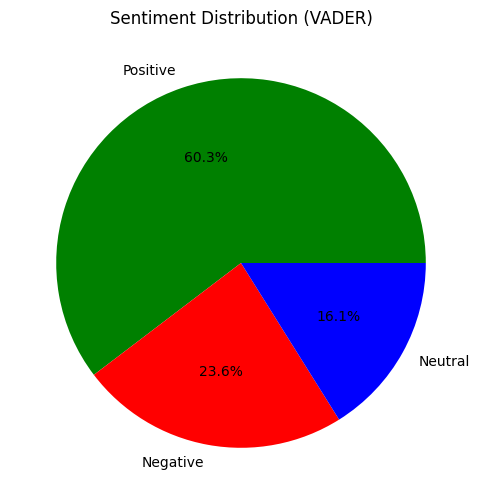

C:\Users\hj\AppData\Local\Temp\ipykernel_26768\2258281408.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Predicted_Sentiment", data=df, palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})


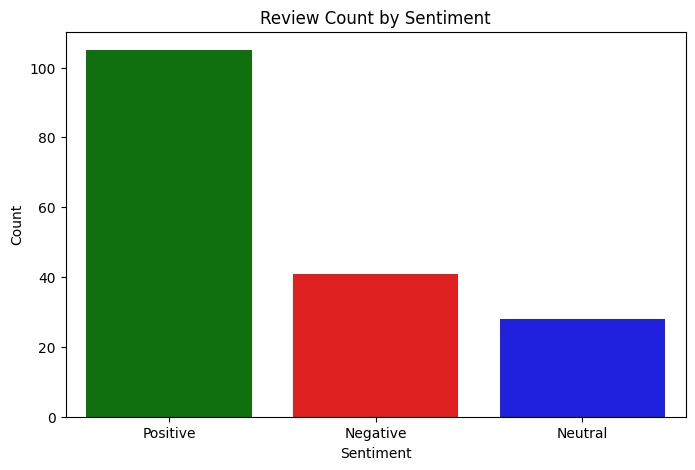

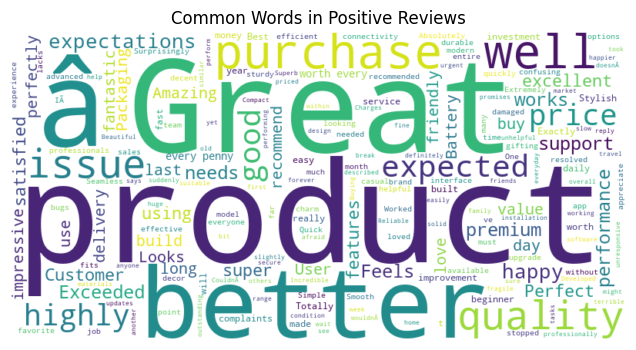

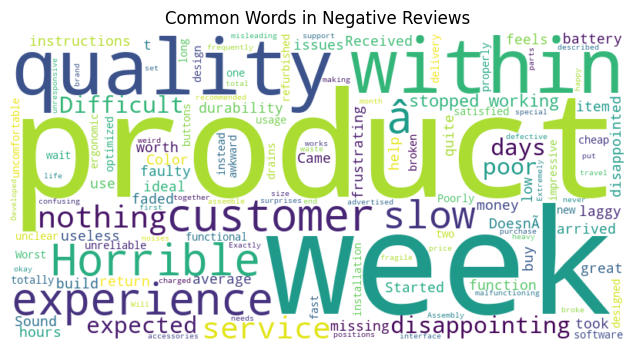

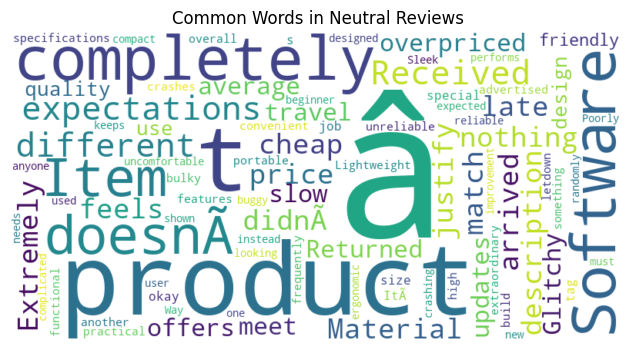

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# ---- Step 1: Load Excel File ----
df = pd.read_excel(r"C:\Users\hj\OneDrive\Desktop\updated_reviews.xlsx")

# ---- Step 2: Initialize VADER Analyzer ----
analyzer = SentimentIntensityAnalyzer()

# ---- Step 3: Function to Get Sentiment ----
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']  # Ensure text is string
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# ---- Step 4: Apply VADER Sentiment Analysis ----
df["Predicted_Sentiment"] = df["Review"].apply(get_vader_sentiment)

# ---- Step 5: Save Updated Excel File ----
df.to_excel(r"C:\Users\hj\OneDrive\Desktop\updated_reviews.xlsx", index=False)
print("✅ Excel Updated Successfully! Now Import 'updated_reviews.xlsx' in Power BI")

# ---- Step 6: Sentiment Distribution (Pie Chart) ----
plt.figure(figsize=(6, 6))
df["Predicted_Sentiment"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["green", "red", "blue"])
plt.title("Sentiment Distribution (VADER)")
plt.ylabel("")
plt.show()

# ---- Step 7: Sentiment Wise Review Count (Bar Chart) ----
plt.figure(figsize=(8, 5))
sns.countplot(x="Predicted_Sentiment", data=df, palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})
plt.title("Review Count by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# ---- Step 8: Generate Word Cloud for Each Sentiment ----
def generate_wordcloud(sentiment):
    text = " ".join(df[df["Predicted_Sentiment"] == sentiment]["Review"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Common Words in {sentiment} Reviews")
    plt.show()

generate_wordcloud("Positive")
generate_wordcloud("Negative")
generate_wordcloud("Neutral")
